### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)

<b>Integrantes:</b><br>
* Eduardo Hopperdietzel
* Diego Sandoval


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import HTML
import scipy.fft as sfft
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
output_notebook()

with open('elefante_ruidoso.npy', 'rb') as f:
    s = np.load(f)

Loading BokehJS ...

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [2]:
# Largo del arreglo
s_len = len(s)

# Frecuencia de muestreo
fs = 100

# Periodo de muestreo
T = 1/fs

# Máxima frecuencia analizable
f_max = fs/2

# Analizamos la estructura del arreglo
print("Estructura del arreglo:",s.shape,"(1 dimensión) (números complejos)")

# Imprimimos el total de muestras
print("Número total de muestras:",s_len)

# Imprimimos la frecuencia de muestreo
print("Frecuencia de Muestreo:",100,"hz")

# Calculamos la duración total de la señal en segundos (Nº Muestras / Frecuencia de Muestreo)
print("Duración total de la señal:",s_len/fs,"segundos <<<<< (INCLUIR FORMULA)")

# Imprimimos la máxima frecuencia analizable por la FT (Teorema del muestreo)
print("Máxima frecuencia detectable: Entre",-f_max,"hz y",f_max,"hz ( Por ser complejos )  <<<<< (FALTA FUNDAMENTAR)")

Estructura del arreglo: (2000,) (1 dimensión) (números complejos)
Número total de muestras: 2000
Frecuencia de Muestreo: 100 hz
Duración total de la señal: 20.0 segundos <<<<< (INCLUIR FORMULA)
Máxima frecuencia detectable: Entre -50.0 hz y 50.0 hz ( Por ser complejos )  <<<<< (FALTA FUNDAMENTAR)


El rango de frecuencias detectables está limitado por la frecuencia de muestreo.

Existen muchas sinusoides que interpolan un conjunto de muestras, pero la mayoría de esas sinusoides no corresponden a los componentes originales de la señal captada, sino que son 'aliases', es decir, señales que coincidentemente tienen esos mismos valores en los puntos de muestreo de la señal analizada.

Para evitar estos 'aliases', se limita la frecuencia máxima que retorna la transformada de Fourier a Fs/2, es decir, la frecuencia de Nyquist.

Cuando se intenta analizar una frecuencia mayor a Fs/2, no se tiene la información suficiente para poder discernir entre un alias y una frecuencia que realmente estaba en la señal original.

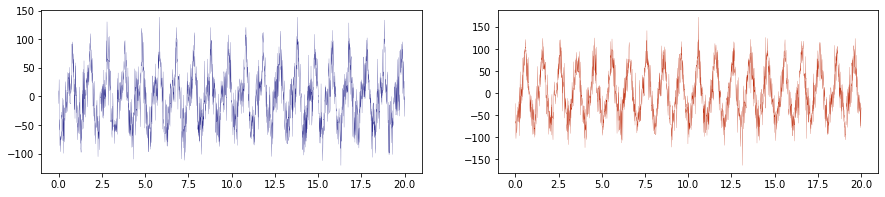

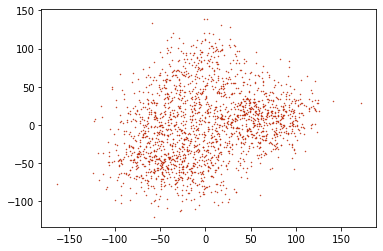

In [3]:
# Graficamos Re(s), Im(s) en función del tiempo

timeArray = np.linspace(0, 20, num=2000)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 3)
ax[0].plot(timeArray,np.real(s),linewidth=.2,color='#222288')
ax[1].plot(timeArray,np.imag(s),linewidth=.2,color='#BB2200')

#Scatter plot de Re(s) en función Im(s).

plt.figure()
plt.scatter(np.imag(s),np.real(s),s=.2,color='#BB2200')

Tanto las componentes reales como las imaginarias son señales periódicas con ruido. La frecuencia fundamental de ambas señales es aproximadamente 1 Hz.

Respecto a la nube de puntos, ...

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


In [4]:
def spectrums(s,fs):
    
    # Calcula la transformada de la señal 
    S = sfft.fft(s)
    
    # Obtiene el espectro de amplitud ( En función del índice, no de la frecuencia )
    SA = np.absolute(S)
    
    # Obtiene el espectro de fase ( En función del índice, no de la frecuencia )
    SP = np.angle(S)
    
    # Obtiene el arrglo de índices de frecuencias
    freqs = sfft.fftfreq(len(s),1/fs)
    
    return SA, SP, freqs


SA,SP,freqs = spectrums(s,fs)


plot1 = figure(title="Espectro de Amplitud", x_axis_label='frecuencia', y_axis_label='amplitud')
plot1.line(freqs, SA, line_width=2)

plot2 = figure(title="Espectro de Fase", x_axis_label='frecuencia', y_axis_label='fase')
plot2.line(freqs, SP, line_width=2)

show(plot1)
show(plot2)    


In [5]:
def simpleFilter(SA,M):
    
    # Obtenemos los índices de los mayores M elementos de SA
    max_indexs = SA.argsort()[-M:][::-1]
    
    # Creamos un arreglo de ceros
    SAM = np.zeros(len(SA))
    
    # Asignamos los valores máximos previamente calculados en los respectivos índices
    for i in max_indexs:
        SAM[i] = SA[i]
    
    return SAM, max_indexs


SAM, max_indexs = simpleFilter(SA,7)

plot3 = figure(title="Espectro de Amplitud", x_axis_label='frecuencia', y_axis_label='amplitud')
plot3.line(freqs, SAM, line_width=2)
show(plot3)


arr = np.array([list(range(1,8)),freqs[max_indexs],SA[max_indexs],SP[max_indexs]]).transpose()
df = pd.DataFrame(arr, columns=["Componente","Frecuencia","Aplitud","Fase"])
HTML(df.to_html(index=False))


Componente,Frecuencia,Aplitud,Fase
1.0,-1.0,114172.074964,-1.298869
2.0,1.0,29095.711085,-2.828616
3.0,3.0,21326.973060,-3.039969
4.0,2.0,20598.951615,1.136054
5.0,-2.0,19964.341850,-1.996499
6.0,-5.0,14630.202810,0.107217
7.0,5.0,13788.414605,0.041204


## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

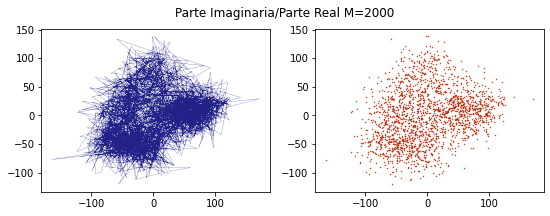

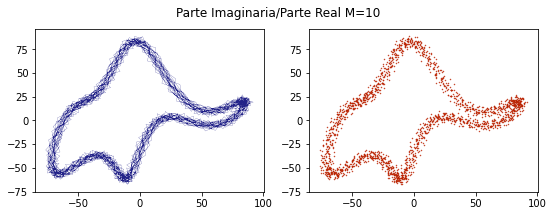

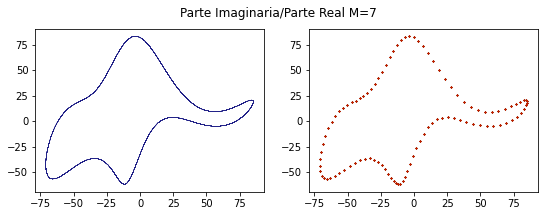

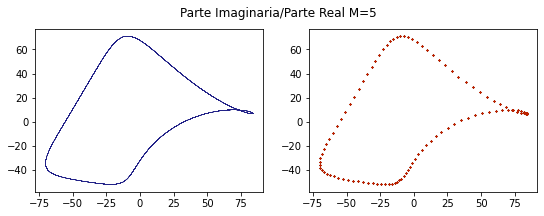

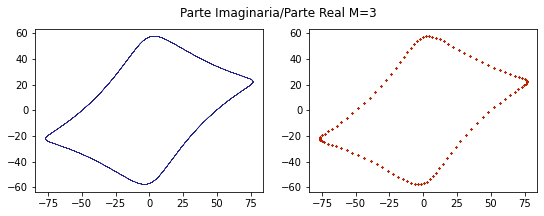

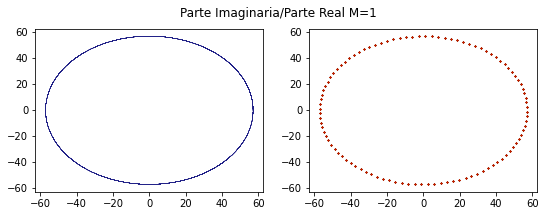

In [6]:
#restoredS = sfft.ifft(SAM*np.exp(1j*SP))
#display(s[:3])
#display(restoredS[:3])

for M in [len(s),10,7,5,3,1]:
    
    # Calcula el espectro de amplitud filtrado según M
    SAM, max_indexs = simpleFilter(SA,M)
        
    # Calculamos la transformada inversa
    restoredS = sfft.ifft(SAM*np.exp(1j*SP))
    
    sReal = np.real(restoredS)
    sImag = np.imag(restoredS)
    
    # Graficamos
    fig, ax = plt.subplots(1,2)
    fig.suptitle('Parte Imaginaria/Parte Real M='+str(M))
    fig.set_size_inches(9, 3)
    ax[0].plot(sImag,sReal,linewidth=.2,color='#222288')
    ax[1].scatter(sImag,sReal,s=.2,color='#BB2200')
    





## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

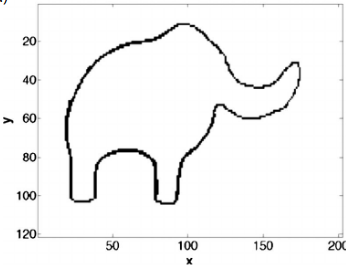